# New Section
# Data Pre Processing

In [ ]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_KDDTrain = pd.read_csv('/content/drive/MyDrive/ML on Cyber Security Dataset/UNBI dataset/NSL-KDD/KDDTrain+.txt')
data = data_KDDTrain

In [ ]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
# Define the mapping for categorization
category_mapping = {
    'normal': 'Normal',
    'neptune': 'DoS',
    'warezclient': 'R2L',
    'ipsweep': 'Probe',
    'portsweep': 'Probe',
    'teardrop': 'DoS',
    'nmap': 'Probe',
    'satan': 'Probe',
    'smurf': 'DoS',
    'pod': 'DoS',
    'back': 'DoS',
    'guess_passwd': 'R2L',
    'ftp_write': 'R2L',
    'multihop': 'R2L',
    'rootkit': 'R2L',
    'buffer_overflow': 'U2R',
    'imap': 'R2L',
    'warezmaster': 'R2L',
    'phf': 'R2L',
    'land': 'DoS',
    'loadmodule': 'U2R',
    'spy': 'R2L',
    'perl': 'U2R'
}

# Apply the categorization mapping to create a new column 'category'
data['category'] = data['normal'].map(category_mapping)

# Get the counts of instances in each category
category_counts = data['category'].value_counts()

# Print the category counts
print(category_counts)


Normal    67342
DoS       45927
Probe     11656
R2L        1005
U2R          42
Name: category, dtype: int64


In [ ]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20,category
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,DoS


In [ ]:
data.shape

(125972, 44)

In [ ]:
data['category'].unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [ ]:
# Data cleaning
data = data.dropna()

In [ ]:
# Feature engineering

encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
data.drop(columns=['tcp', 'ftp_data', 'SF', 'normal'], inplace=True)


In [ ]:
data.head()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,category
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,1
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,1
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,1
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,0


In [ ]:
X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values

In [ ]:
data['category'].unique()

array([1, 0, 3, 2, 4])

In [ ]:
# Feature engineering
'''
# Convert the labels to one-hot encoding
from keras.utils import to_categorical
data['category'] = to_categorical(data['category'], num_classes=5)
#y_test = to_categorical(y_test, num_classes=5)
# tried to convert catgory into numeric form with to categorial.
'''

"\n# Convert the labels to one-hot encoding\nfrom keras.utils import to_categorical\ndata['category'] = to_categorical(data['category'], num_classes=5)\n#y_test = to_categorical(y_test, num_classes=5)\n# tried to convert catgory into numeric form with to categorial.\n"

In [ ]:
# Feature engineering
X = data.drop(['category'], axis=1)
y = data['category']
data1 = X

In [ ]:
y.shape

(125972,)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X = selector.fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
# get the list of selected features
selected_features_mask = selector.get_support()
selected_features = list(data1.columns[selected_features_mask])
print(selected_features)

['0.5', '0.7', '2', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.00.9', '20']


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_resampled.value_counts())


Class distribution after oversampling:
0    53956
1    53956
2    53956
3    53956
4    53956
Name: category, dtype: int64


In [ ]:
y_test.shape

(25195,)

In [ ]:
'''
from keras.utils import to_categorical

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

'''

'\nfrom keras.utils import to_categorical\n\n# Convert the labels to one-hot encoding\ny_train = to_categorical(y_train, num_classes=5)\ny_test = to_categorical(y_test, num_classes=5)\n'

# New Section
# DNN model

### DNN with balanced dataset

In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled


In [ ]:
# Build DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=20))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=5, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# this is because of the binary or multicalss classification
#dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Print the input shape of the DNN model
print("Input shape of DNN model:", dnn_model.layers[0].input_shape)

Input shape of DNN model: (None, 20)


In [ ]:
# Train DNN model
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
dnn_model.fit(X_train, pd.get_dummies(y_train), validation_data=(X_test, pd.get_dummies(y_test)), epochs=15, batch_size=32, callbacks=[early_stop])


Epoch 1/15
8431/8431 [==============================] - 25s 3ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0431 - val_accuracy: 0.9851
Epoch 2/15
8431/8431 [==============================] - 23s 3ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 3/15
8431/8431 [==============================] - 17s 2ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0207 - val_accuracy: 0.9942
Epoch 4/15
8431/8431 [==============================] - 17s 2ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0192 - val_accuracy: 0.9945
Epoch 5/15
8431/8431 [==============================] - 17s 2ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 6/15
8431/8431 [==============================] - 17s 2ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 7/15
8431/8431 [==============================] - 19s 2ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0199 - val_ac

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your DNN model and obtained predictions
dnn_probs = dnn_model.predict(X_test)
dnn_probs_classes = np.argmax(dnn_probs, axis=1)  # Convert probabilities to class labels

# Assuming you have the true labels for the test data
y_true = y_test  # Replace y_test with your true labels

# Generate the classification report
report = classification_report(y_true, dnn_probs_classes)

# Print the classification report
print(report)


788/788 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.98      1.00      0.99      2373
           3       0.90      0.97      0.94       201
           4       0.41      0.64      0.50        11

    accuracy                           1.00     25195
   macro avg       0.86      0.92      0.88     25195
weighted avg       1.00      1.00      1.00     25195



### DNN test without one hot encoder

In [ ]:
# Build DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=20))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=5, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# this is because of the binary or multicalss classification
#dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
# Print the input shape of the DNN model
print("Input shape of DNN model:", dnn_model.layers[0].input_shape)

Input shape of DNN model: (None, 20)


In [ ]:
# Train DNN model
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
dnn_model.fit(X_train, pd.get_dummies(y_train), validation_data=(X_test, pd.get_dummies(y_test)), epochs=15, batch_size=32, callbacks=[early_stop])


Epoch 1/15
3150/3150 [==============================] - 5s 2ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0185 - val_accuracy: 0.9927
Epoch 2/15
3150/3150 [==============================] - 6s 2ms/step - loss: 0.0156 - accuracy: 0.9944 - val_loss: 0.0149 - val_accuracy: 0.9945
Epoch 3/15
3150/3150 [==============================] - 5s 1ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.0131 - val_accuracy: 0.9955
Epoch 4/15
3150/3150 [==============================] - 5s 2ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.0141 - val_accuracy: 0.9951
Epoch 5/15
3150/3150 [==============================] - 5s 2ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.0131 - val_accuracy: 0.9952
Epoch 6/15
3150/3150 [==============================] - 5s 1ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0121 - val_accuracy: 0.9955
Epoch 7/15
3150/3150 [==============================] - 9s 3ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0124 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your DNN model and obtained predictions
dnn_probs = dnn_model.predict(X_test)
dnn_probs_classes = np.argmax(dnn_probs, axis=1)  # Convert probabilities to class labels

# Assuming you have the true labels for the test data
y_true = y_test  # Replace y_test with your true labels

# Generate the classification report
report = classification_report(y_true, dnn_probs_classes)

# Print the classification report
print(report)


788/788 [==============================] - 1s 855us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.99      0.99      0.99      2373
           3       0.93      0.93      0.93       201
           4       1.00      0.45      0.62        11

    accuracy                           1.00     25195
   macro avg       0.98      0.87      0.91     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/Working March 2023/Models/NSL KDD 5 clasess/dnn_model.pkl', 'wb') as f:
    pickle.dump(dnn_model, f)

## DNN with one hot encoder

### Doesn't work without onehot encoder

In [ ]:
# Define the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))
dnn_model.add(Dense(64, input_shape = (20,), activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(20, activation='softmax'))

# Compile the model
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Print the input shape of the DNN model
print("Input shape of DNN model:", dnn_model.layers[0].input_shape)

Input shape of DNN model: (None, 20)


In [ ]:
# Train the model
dnn_model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your DNN model and obtained predictions
y_pred = dnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Assuming you have the true labels for the test data
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print(report)


788/788 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.99      0.99      0.99      2373
           3       0.91      0.95      0.93       201
           4       1.00      0.36      0.53        11

    accuracy                           1.00     25195
   macro avg       0.98      0.86      0.89     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/Working March 2023/Models/NSL KDD 5 clasess/dnn_model.pkl', 'wb') as f:
    pickle.dump(dnn_model, f)

# New Section
# XG Boost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()



In [ ]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Make predictions on the test data
xgboost_y_pred = xgb_model.predict(X_test)

In [ ]:
X_test.shape

(25195, 20)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, xgboost_y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.81%


In [ ]:
# Get the predicted probabilities from the XGBoost model
xgboost_probs = xgb_model.predict_proba(X_test)

In [ ]:
# Print the classification report
report = classification_report(y_test, xgboost_y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.99      1.00      0.99      2373
           3       0.95      0.98      0.97       201
           4       0.67      0.73      0.70        11

    accuracy                           1.00     25195
   macro avg       0.92      0.94      0.93     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
y_test.shape

(25195,)

In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/MS Thesis Report/Working March 2023/Models/NSL KDD 5 clasess/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# New Section
# Ensembel XGBoost and DNN on NSL KDD dataset

In [ ]:
# Combine the probabilities by averaging
ensemble_probs = (xgboost_probs + dnn_probs) / 2


In [ ]:
# Apply softmax normalization
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

ensemble_probs = softmax(ensemble_probs)

In [ ]:
import pickle


# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/MS Thesis Report/Working March 2023/Models/NSL KDD 5 clasess/ensemble_probs.pkl', 'wb') as f:
    pickle.dump(ensemble_probs, f)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have the true labels for the test data as y_test

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)



## Performance Matrix

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_labels)
print("Accuracy:", accuracy)



Accuracy: 0.9975391942845803


In [ ]:
# Generate classification report
report = classification_report(y_test, ensemble_labels)
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.99      1.00      0.99      2373
           3       0.93      0.99      0.96       201
           4       0.54      0.64      0.58        11

    accuracy                           1.00     25195
   macro avg       0.89      0.92      0.91     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_labels)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 9211     4     9     0     0]
 [    6 13348    17    10     5]
 [    0     1  2369     3     0]
 [    1     1     0   198     1]
 [    0     1     1     2     7]]


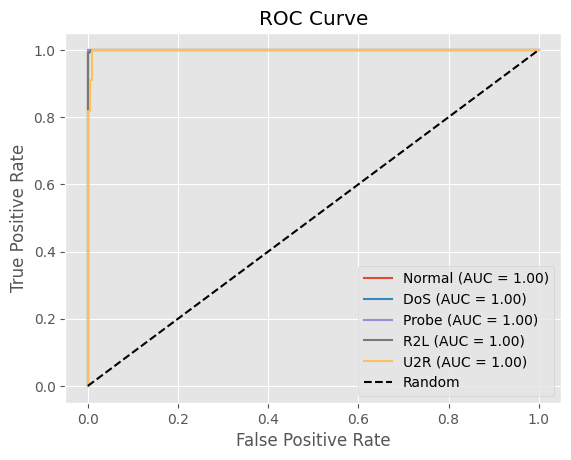

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Assuming you have the true labels for the test data as y_test
# Assuming you have the ensemble probabilities from the ensemble model as ensemble_probs

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)

# Convert true labels into one-hot encoded format
y_true = to_categorical(y_test)

# Define the number of classes
num_classes = y_true.shape[1]

# Define class label names
label_names = {
     0: "Normal",
    1: "DoS",
    2: "Probe",
    3: "R2L",
    4: "U2R",

}

# Calculate the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], ensemble_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves in one graph
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(label_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# Save the ROC curve as an image file
plt.savefig('All_roc_curve.png'.format(i))  # Change the file name as desired
plt.close()


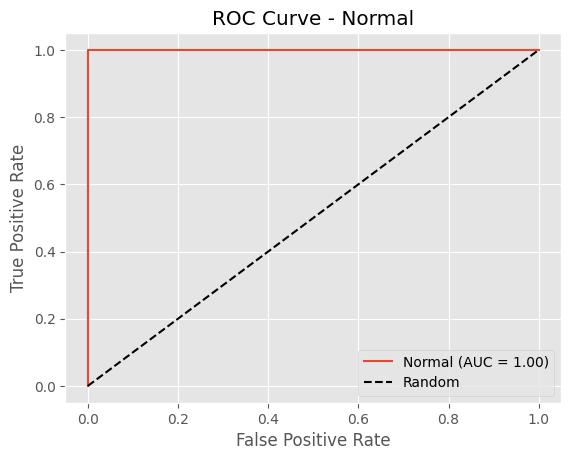

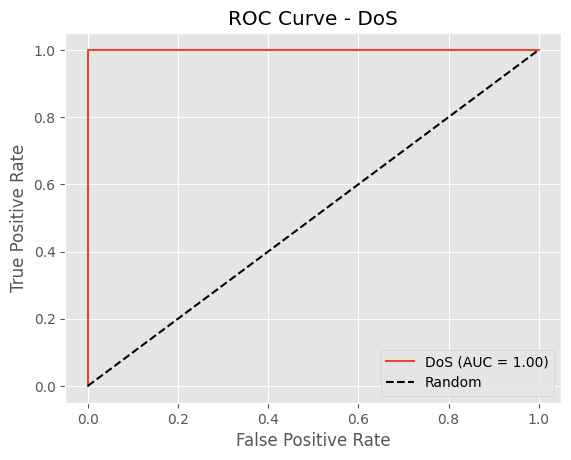

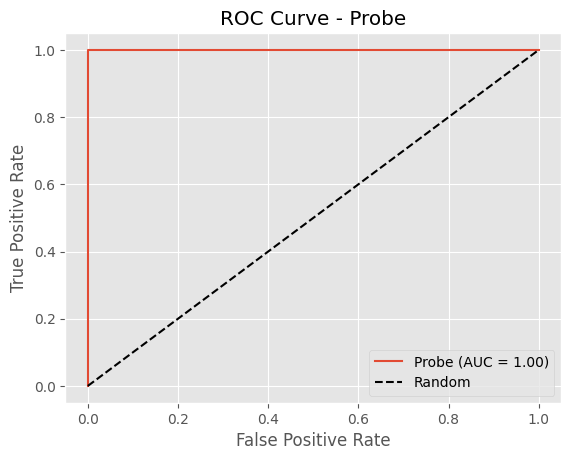

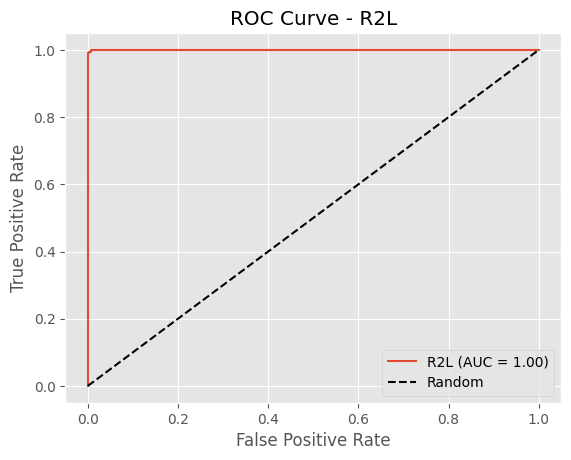

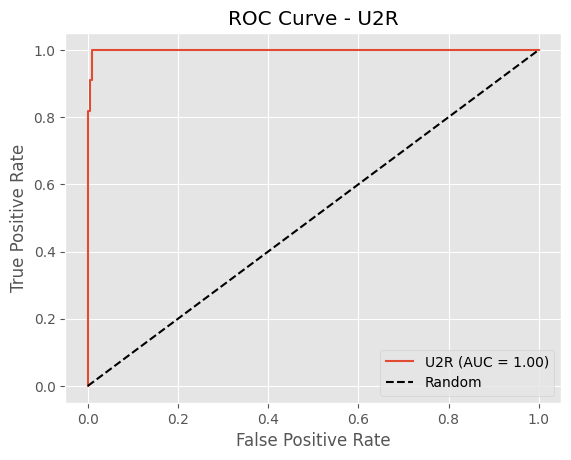

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Assuming you have the true labels for the test data as y_test
# Assuming you have the ensemble probabilities from the ensemble model as ensemble_probs

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)

# Convert true labels into one-hot encoded format
y_true = to_categorical(y_test)

# Define the number of classes
num_classes = y_true.shape[1]

# Define class label names
label_names = {
     0: "Normal",
    1: "DoS",
    2: "Probe",
    3: "R2L",
    4: "U2R",
}

# Calculate the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], ensemble_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot the ROC curve for each class
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(label_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(label_names[i]))
    plt.legend(loc='lower right')
    plt.show()
    # Save the ROC curve as an image file
    plt.savefig('roc_curve_class{}.png'.format(i))  # Change the file name as desired
    plt.close()


# New Section
# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Assuming you have preprocessed and split your dataset into X_train, X_test, y_train, y_test

# Instantiate a Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)



GaussianNB()

In [ ]:

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9224
           1       0.97      0.72      0.83     13386
           2       0.57      0.83      0.68      2373
           3       0.28      0.44      0.34       201
           4       0.00      0.91      0.01        11

    accuracy                           0.79     25195
   macro avg       0.56      0.75      0.55     25195
weighted avg       0.93      0.79      0.84     25195

Accuracy: 0.7854733081960706
Confusion Matrix:
[[8042  245  663   29  245]
 [ 170 9678  816  199 2523]
 [  25   28 1972    1  347]
 [   1    1    2   88  109]
 [   1    0    0    0   10]]


# New Section
# LR

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend

# Create a pipeline with SVM
pipeline = make_pipeline(StandardScaler(), SVC())

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Perform grid search with parallel processing
with parallel_backend('multiprocessing'):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_




In [ ]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9224
           1       1.00      1.00      1.00     13386
           2       0.98      0.99      0.99      2373
           3       0.94      0.95      0.95       201
           4       1.00      0.55      0.71        11

    accuracy                           1.00     25195
   macro avg       0.98      0.90      0.93     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy: 0.9961500297678111
Confusion Matrix:
[[ 9209     7     8     0     0]
 [    8 13339    31     8     0]
 [   10     9  2353     1     0]
 [    2     2     6   191     0]
 [    0     1     1     3     6]]


# New Section